In [2]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!pip install -q torch diffusers transformers accelerate safetensors pillow



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\Users\spkr1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import torch
from diffusers import StableDiffusionPipeline

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# Model name
model_id = "runwayml/stable-diffusion-v1-5"

# Load pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

pipe = pipe.to(device)

print("Model loaded successfully!")


C:\Users\spkr1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Using device: cpu


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Model loaded successfully!



==== Continuous AI Image Generator ====
Type 'exit' or 'quit' to stop


🎨 Generating image... Please wait...


  0%|          | 0/30 [00:00<?, ?it/s]

✅ Saved as: image_20260205_102006.png


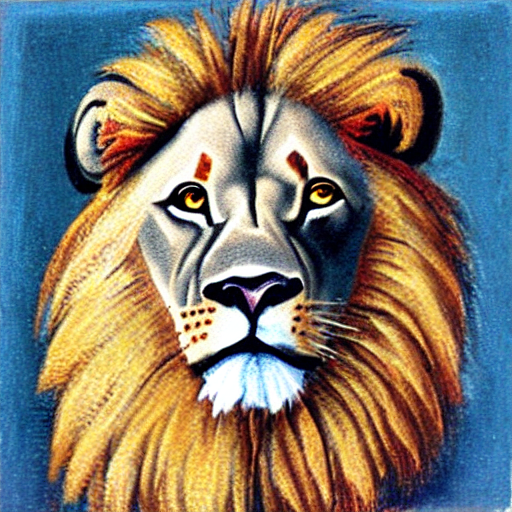


🎨 Generating image... Please wait...


  0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [2]:
from PIL import Image
from datetime import datetime

def generate_image(prompt):
    try:
        print("\n🎨 Generating image... Please wait...")

        result = pipe(
            prompt=prompt,
            guidance_scale=7.5,
            num_inference_steps=30
        )

        image = result.images[0]

        # Save with timestamp
        filename = datetime.now().strftime("image_%Y%m%d_%H%M%S.png")
        image.save(filename)

        print("✅ Saved as:", filename)

        return image, filename

    except Exception as e:
        print("❌ Error:", e)
        return None, None


print("\n==== Continuous AI Image Generator ====")
print("Type 'exit' or 'quit' to stop\n")

while True:

    # Take user input
    prompt = input("\n📝 Enter your prompt:\n> ")

    # Exit condition
    if prompt.lower() in ["exit", "quit", "stop"]:
        print("\n👋 Stopping generator. Bye!")
        break

    if not prompt.strip():
        print("⚠️ Prompt cannot be empty!")
        continue

    # Generate image
    img, name = generate_image(prompt)

    # Display image
    if img:
        display(img)
